In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the sheets named 'data' and 'set'
dfs = pd.read_excel('data/test_task_for_working_students_UX_UI_data_analytics.xlsx', sheet_name=['data', 'test'])

# Accessing individual DataFrames
train_set = dfs['data']
test_set = dfs['test']

In [77]:
train_set.head(5)

,id,visit_id,visitor_id,domain,url,country,date,page_views,time on site
0,v1,visit_1,visitor_1,domain_2,url_118,c_01,2013-11-04 14:48:10,1,0
1,v2,visit_2,visitor_2,domain_2,url_141,c_02,2014-05-16 14:28:02,1,0
2,v3,visit_3,visitor_3,domain_2,url_23,c_03,2013-02-20 09:24:27,1,0
3,v6,visit_6,visitor_6,domain_2,url_40,c_06,2014-05-06 22:26:43,1,71
4,v10,visit_10,visitor_10,domain_2,url_131,c_03,2013-11-27 15:10:30,1,0


In [78]:
test_set.head(5)

,record_id,Years,date,domain,url,country,page views
0,1,2012,Jan,domain_1,url_1,c_03,1.0
1,2,2012,Jan,domain_1,url_1,c_05,2.0
2,3,2012,Jan,domain_1,url_1,c_07,12.0
3,4,2012,Jan,domain_1,url_1,c_08,2.0
4,5,2012,Jan,domain_1,url_1,c_09,1.0


## Descriptive statistics of datasets

In [79]:
train_set.describe(include="all")

,id,visit_id,visitor_id,domain,url,country,date,page_views,time on site
count,34729,34729,34729,34729,34729,34729,34729,34729.000000,34729.000000
unique,34729,23061,20556,2,131,37,NaN,NaN,NaN
top,v1,visit_2765,visitor_3600,domain_2,url_106,c_17,NaN,NaN,NaN
freq,1,61,170,30825,741,4354,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-25 12:25:20.447608320,0.929166,45.031184
min,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-01 03:20:50,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-20 08:43:58,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-12 11:18:34,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-25 11:16:27,1.000000,20.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-30 23:46:40,1.000000,1798.000000


In [80]:
test_set.describe(include='all')

,record_id,Years,date,domain,url,country,page views
count,12402.000000,12402.000000,12402,12402,12402,12402,10446.000000
unique,NaN,NaN,12,2,142,37,NaN
top,NaN,NaN,Jan,domain_2,url_57,c_11,NaN
freq,NaN,NaN,1350,11600,213,1065,NaN
mean,6201.500000,2012.713998,NaN,NaN,NaN,NaN,4.772066
std,3580.293354,0.720888,NaN,NaN,NaN,NaN,10.839825
min,1.000000,2012.000000,NaN,NaN,NaN,NaN,0.000000
25%,3101.250000,2012.000000,NaN,NaN,NaN,NaN,1.000000
50%,6201.500000,2013.000000,NaN,NaN,NaN,NaN,2.000000
75%,9301.750000,2013.000000,NaN,NaN,NaN,NaN,5.000000


## Null values in each column of datasets

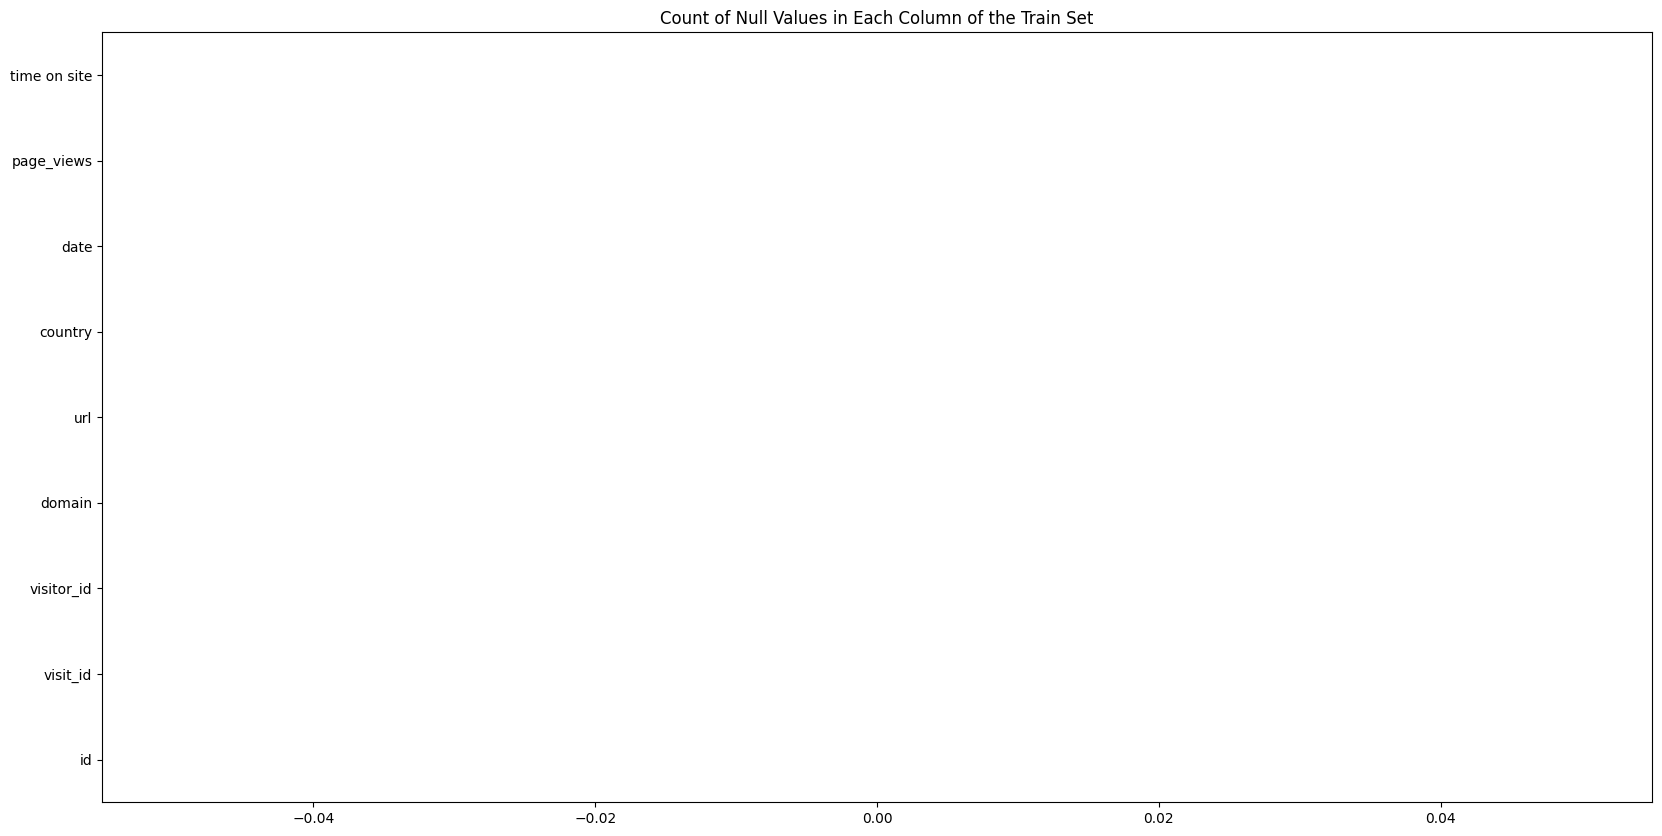

In [81]:
train_set.isnull().sum().plot(kind="barh", figsize=(20,10))
plt.title('Count of Null Values in Each Column of the Train Set')
plt.show()

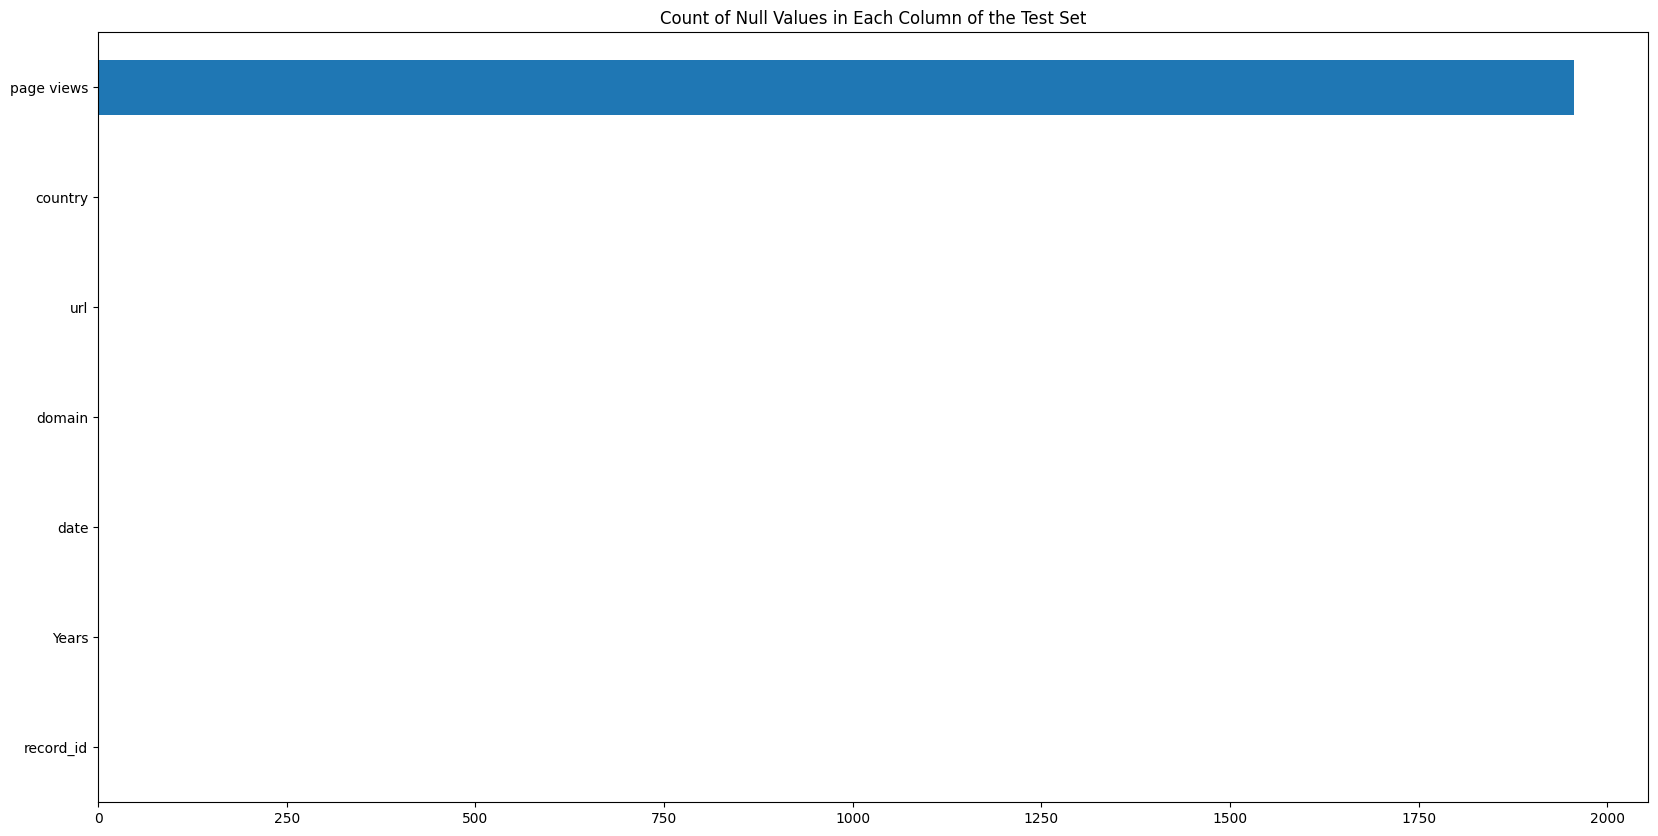

In [82]:
test_set.isnull().sum().plot(kind="barh", figsize=(20,10))
plt.title('Count of Null Values in Each Column of the Test Set')
plt.show()

## Pre-processing

### Filter the data of train_set and test_set, where year is 2014

In [83]:
train_set['date'] = pd.to_datetime(train_set['date'], format='%d.%m.%Y %H:%M:%S')
train_set_2014 = train_set[train_set['date'].dt.year == 2014]
train_set_2014 = train_set_2014.drop(['id','visit_id', 'visitor_id', 'date', 'time on site'], axis=1)
train_set_2014.head(5)

,domain,url,country,page_views
1,domain_2,url_141,c_02,1
3,domain_2,url_40,c_06,1
5,domain_2,url_113,c_10,1
6,domain_2,url_72,c_03,1
13,domain_2,url_85,c_08,1


In [84]:
test_set_2014 = test_set[test_set['Years'] == 2014]
test_set_2014 = test_set_2014.drop(['record_id', 'Years', 'date'], axis=1)
test_set_2014.head(5)

,domain,url,country,page views
10446,domain_1,url_10,c_14,NaN
10447,domain_1,url_10,c_21,NaN
10448,domain_1,url_10,c_25,NaN
10449,domain_1,url_10,c_29,NaN
10450,domain_1,url_10,c_34,NaN


### Visualize the count of values in each column of datasets

**Train_set**

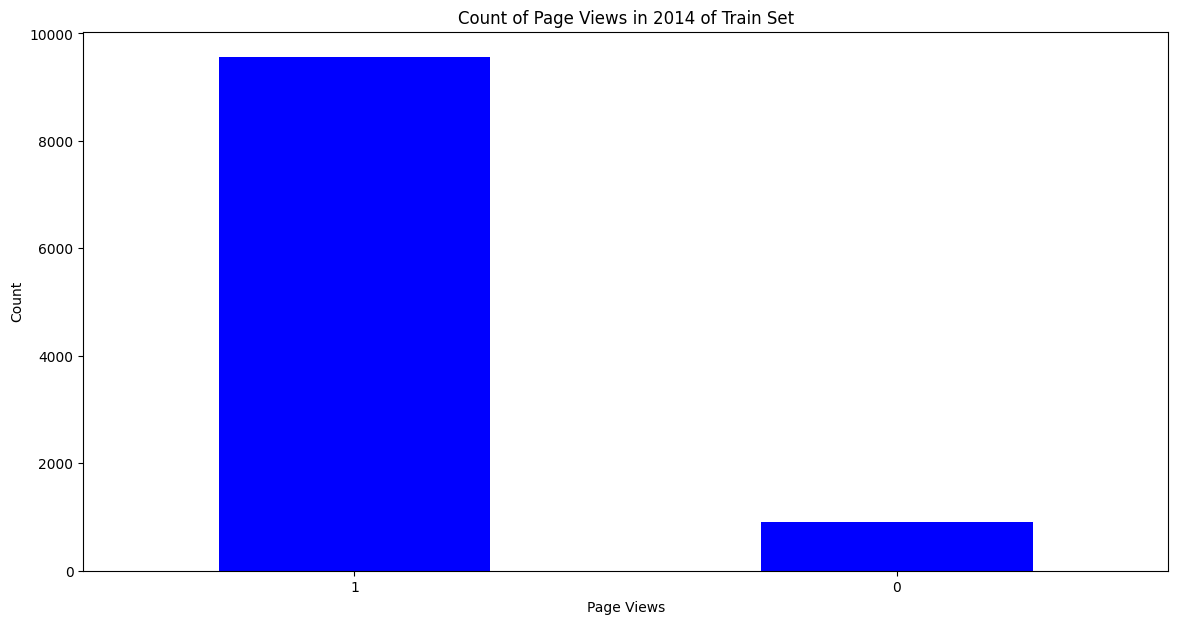

In [85]:
page_views_counts_train = train_set_2014["page_views"].value_counts()

plt.figure(figsize=(14, 7))
page_views_counts_train.plot(kind='bar', color='blue')
plt.title('Count of Page Views in 2014 of Train Set')
plt.xlabel('Page Views')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

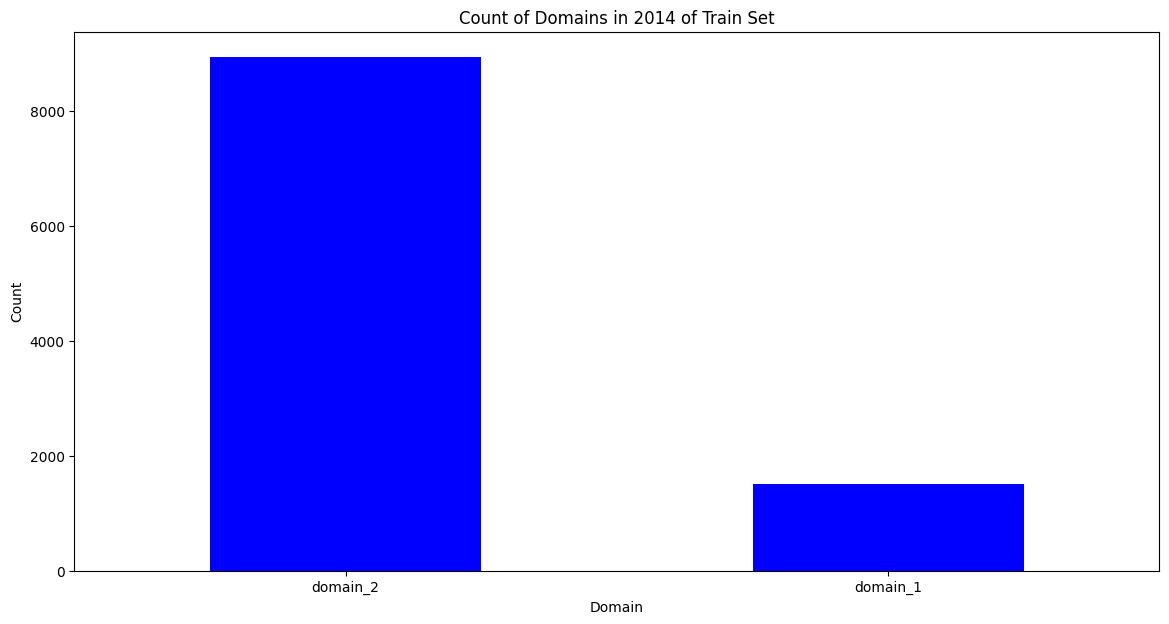

In [86]:
domain_counts_train = train_set_2014["domain"].value_counts()

plt.figure(figsize=(14, 7))
domain_counts_train.plot(kind='bar', color='blue')
plt.title('Count of Domains in 2014 of Train Set')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

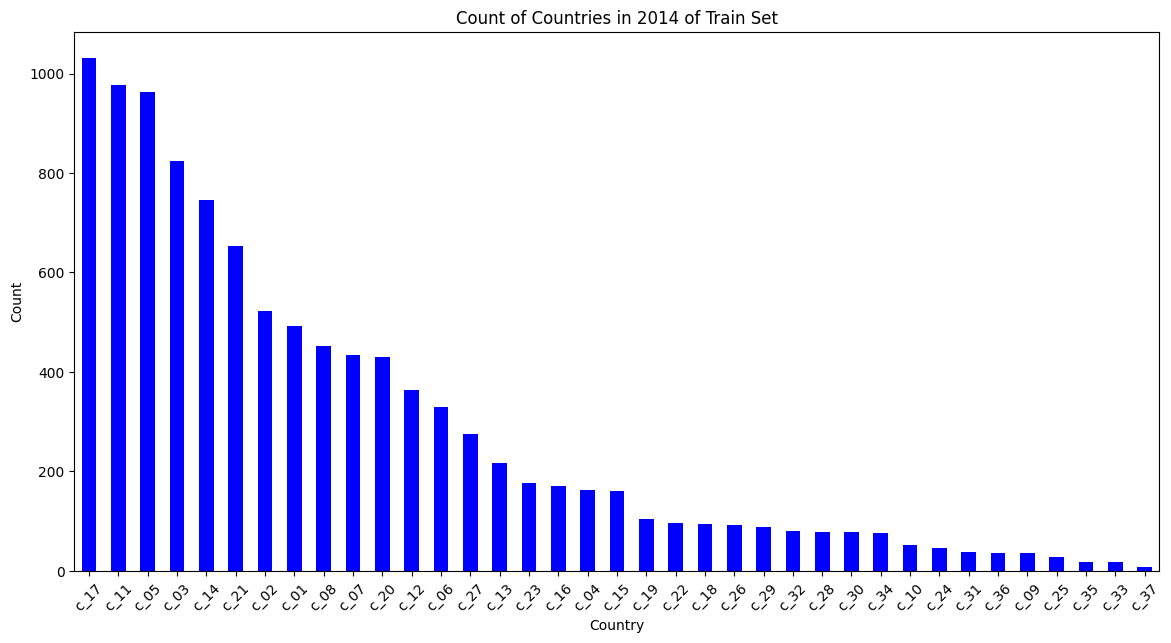

In [87]:
country_counts_train = train_set_2014["country"].value_counts()

plt.figure(figsize=(14, 7))
country_counts_train.plot(kind='bar', color='blue')
plt.title('Count of Countries in 2014 of Train Set')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

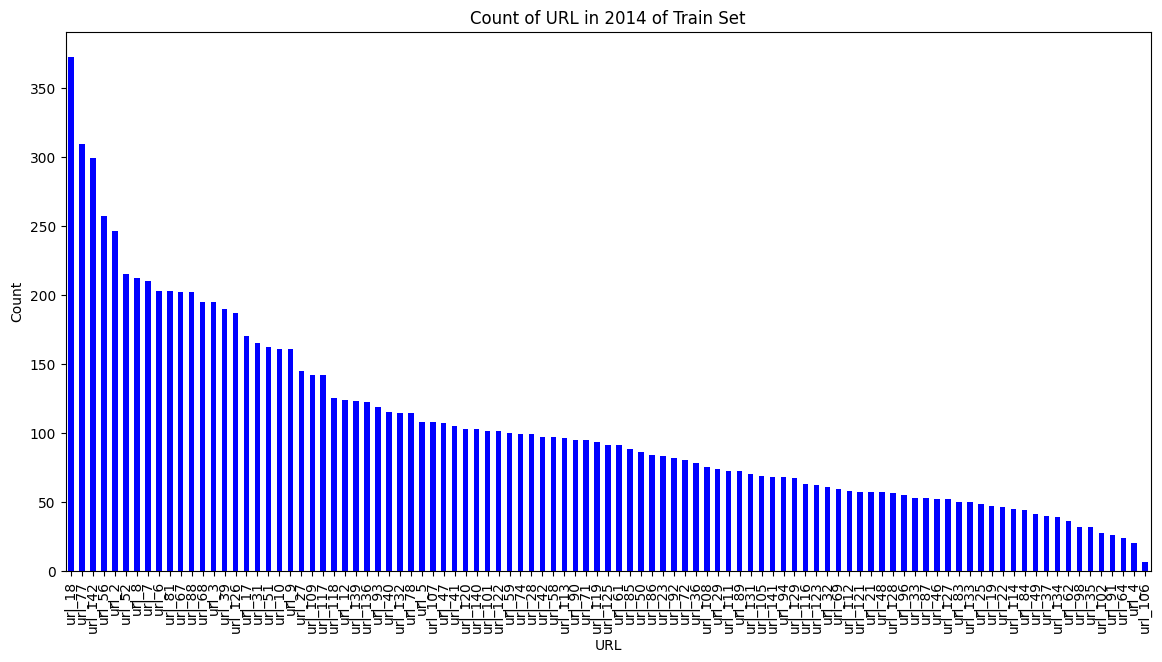

In [88]:
url_counts_train = train_set_2014["url"].value_counts()

plt.figure(figsize=(14, 7))
url_counts_train.plot(kind='bar', color='blue')
plt.title('Count of URL in 2014 of Train Set')
plt.xlabel('URL')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Test_set**

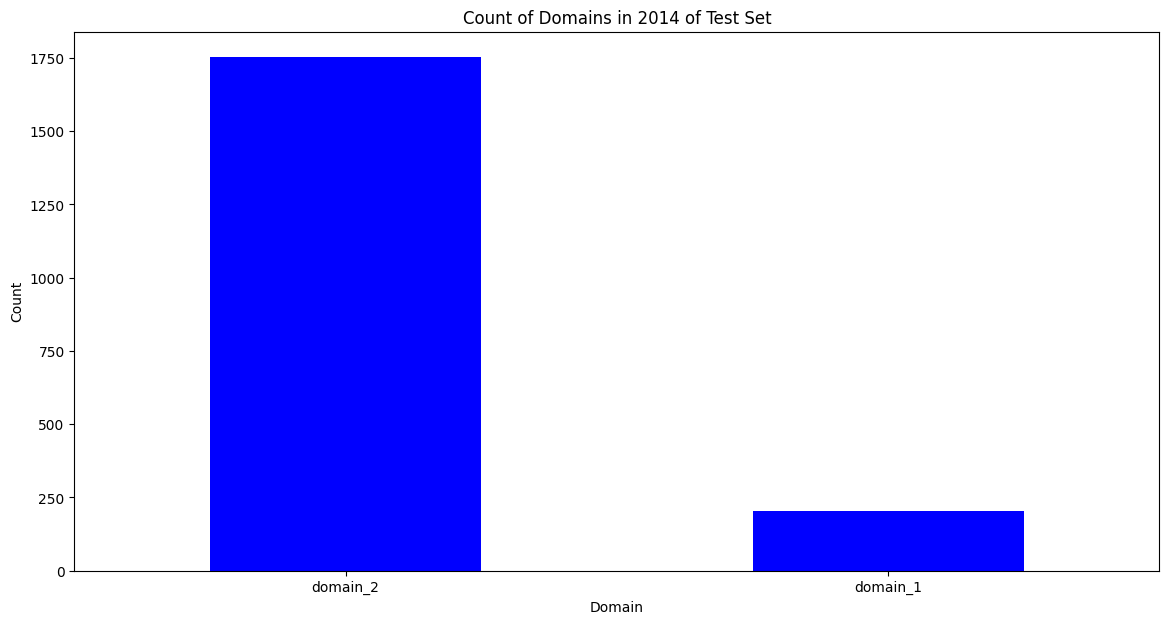

In [89]:
domain_counts_test = test_set_2014["domain"].value_counts()

plt.figure(figsize=(14, 7))
domain_counts_test.plot(kind='bar', color='blue')
plt.title('Count of Domains in 2014 of Test Set')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

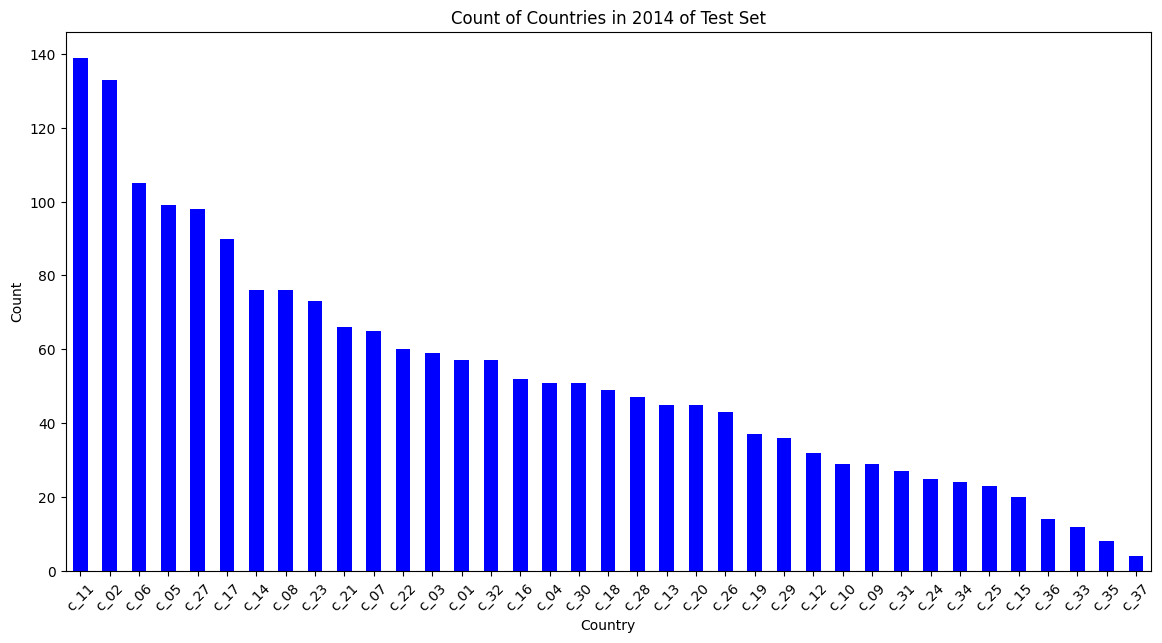

In [90]:
country_counts_test = test_set_2014["country"].value_counts()

plt.figure(figsize=(14, 7))
country_counts_test.plot(kind='bar', color='blue')
plt.title('Count of Countries in 2014 of Test Set')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

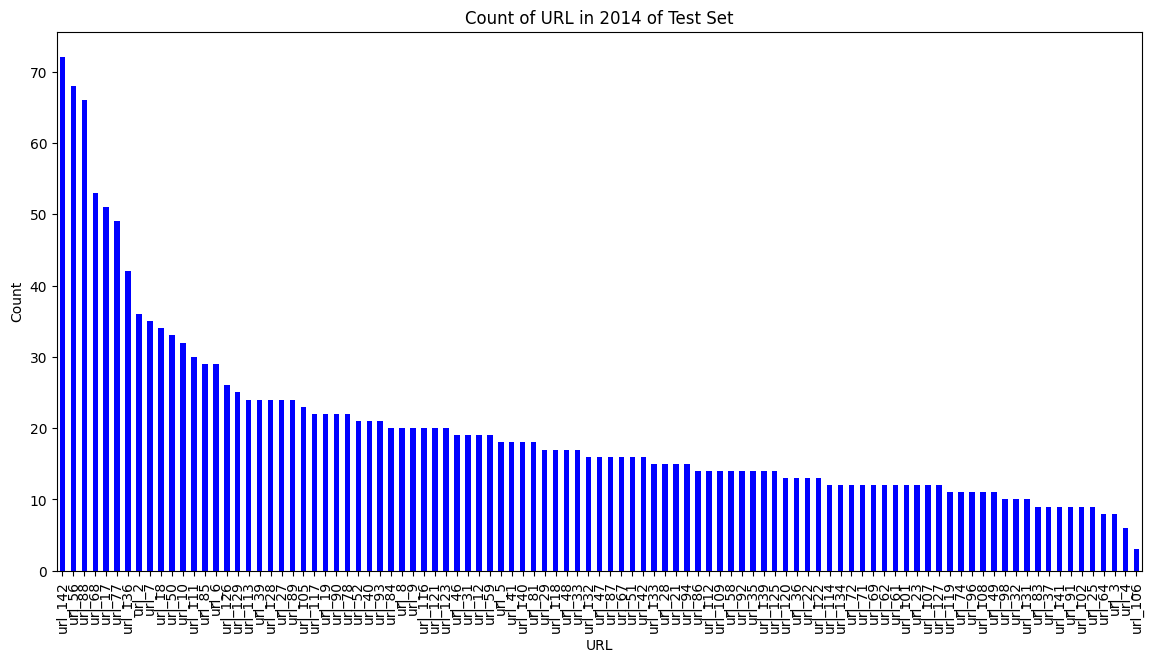

In [91]:
url_counts_test = test_set_2014["url"].value_counts()

plt.figure(figsize=(14, 7))
url_counts_test.plot(kind='bar', color='blue')
plt.title('Count of URL in 2014 of Test Set')
plt.xlabel('URL')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Check the distinct values in each column of both filtered train_set and test_set

In [92]:
unique_domains_train = sorted(train_set_2014['domain'].unique())
unique_domains_test = sorted(test_set_2014['domain'].unique())

# Combine unique domains to ensure all categories are considered
all_unique_domains = sorted(set(unique_domains_train + unique_domains_test))

print(all_unique_domains)
print(len(all_unique_domains))

train_set_2014['domain'] = train_set_2014['domain'].str.replace('domain_', '').astype(int)
test_set_2014['domain'] = test_set_2014['domain'].str.replace('domain_', '').astype(int)

['domain_1', 'domain_2']
2


In [93]:
unique_urls_train = sorted(train_set_2014['url'].unique())
unique_urls_test = sorted(test_set_2014['url'].unique())

# Combine unique domains to ensure all categories are considered
all_unique_urls = sorted(set(unique_urls_train + unique_urls_test))

print(all_unique_urls)
print(len(all_unique_urls) )

train_set_2014['url'] = train_set_2014['url'].str.replace('url_', '').astype(int)
test_set_2014['url'] = test_set_2014['url'].str.replace('url_', '').astype(int)

['url_10', 'url_101', 'url_102', 'url_105', 'url_106', 'url_107', 'url_108', 'url_109', 'url_111', 'url_112', 'url_113', 'url_114', 'url_116', 'url_117', 'url_118', 'url_119', 'url_12', 'url_120', 'url_121', 'url_122', 'url_123', 'url_125', 'url_126', 'url_127', 'url_128', 'url_129', 'url_131', 'url_132', 'url_133', 'url_134', 'url_136', 'url_139', 'url_140', 'url_141', 'url_142', 'url_17', 'url_18', 'url_19', 'url_2', 'url_21', 'url_22', 'url_23', 'url_25', 'url_27', 'url_28', 'url_29', 'url_3', 'url_31', 'url_32', 'url_33', 'url_35', 'url_36', 'url_37', 'url_39', 'url_4', 'url_40', 'url_41', 'url_42', 'url_46', 'url_47', 'url_48', 'url_49', 'url_5', 'url_50', 'url_51', 'url_52', 'url_56', 'url_58', 'url_59', 'url_6', 'url_61', 'url_62', 'url_64', 'url_67', 'url_68', 'url_69', 'url_7', 'url_71', 'url_72', 'url_74', 'url_77', 'url_78', 'url_8', 'url_81', 'url_83', 'url_84', 'url_85', 'url_86', 'url_87', 'url_88', 'url_89', 'url_9', 'url_90', 'url_91', 'url_92', 'url_93', 'url_94', 'url

In [94]:
unique_countries_train = sorted(train_set_2014['country'].unique())
unique_countries_test = sorted(test_set_2014['country'].unique())

# Combine unique domains to ensure all categories are considered
all_unique_countries = sorted(set(unique_countries_train + unique_countries_test))

print(all_unique_countries)
print(len(all_unique_countries))

train_set_2014['country'] = train_set_2014['country'].str.replace('c_', '').astype(int)
test_set_2014['country'] = test_set_2014['country'].str.replace('c_', '').astype(int)

['c_01', 'c_02', 'c_03', 'c_04', 'c_05', 'c_06', 'c_07', 'c_08', 'c_09', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26', 'c_27', 'c_28', 'c_29', 'c_30', 'c_31', 'c_32', 'c_33', 'c_34', 'c_35', 'c_36', 'c_37']
37


In [95]:
train_set_2014.head(5)

,domain,url,country,page_views
1,2,141,2,1
3,2,40,6,1
5,2,113,10,1
6,2,72,3,1
13,2,85,8,1


In [96]:
test_set_2014.head(5)

,domain,url,country,page views
10446,1,10,14,NaN
10447,1,10,21,NaN
10448,1,10,25,NaN
10449,1,10,29,NaN
10450,1,10,34,NaN


## Train the model

In [97]:
from sklearn.tree import DecisionTreeClassifier

X_train = train_set_2014[['domain', 'url', 'country']]
y_train = train_set_2014['page_views']
X_test = test_set_2014.drop(['page views'], axis=1)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
predicted_page_views = model.predict(X_test)

## Visualize result of predicted page views in 2014 of test_set

page views
1.0    1917
0.0      39
Name: count, dtype: int64


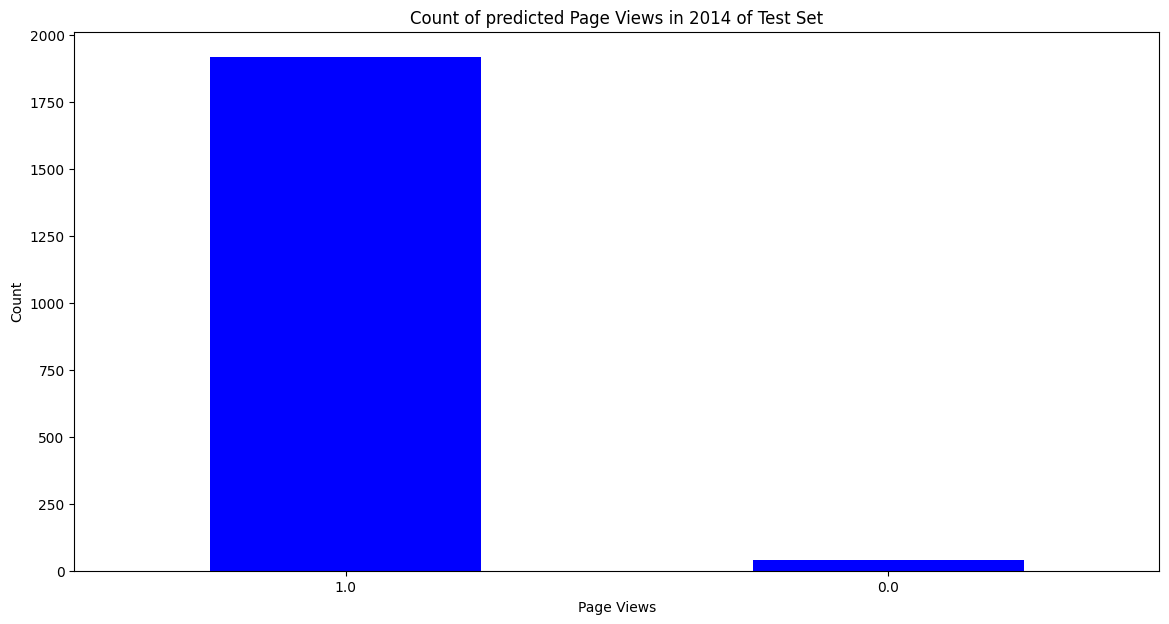

In [98]:
test_set.loc[test_set['Years'] == 2014, 'page views'] = predicted_page_views
counts = test_set.loc[test_set['Years'] == 2014, 'page views'].value_counts()
print(counts)

plt.figure(figsize=(14, 7))
counts.plot(kind='bar', color='blue')
plt.title('Count of predicted Page Views in 2014 of Test Set')
plt.xlabel('Page Views')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Write the result back to the excel file

In [99]:
from openpyxl.reader.excel import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

try:
  
    wb = load_workbook('data/test_task_for_working_students_UX_UI_data_analytics.xlsx')
    
    ws = wb['test']
    
    rows = dataframe_to_rows(test_set, index=False, header=True)
    
    # Write data to the sheet starting from cell A1
    for r_idx, row in enumerate(rows, 1):
        for c_idx, value in enumerate(row, 1):
            ws.cell(row=r_idx, column=c_idx, value=value)
    
    # Save the workbook
    wb.save('data/test_task_for_working_students_UX_UI_data_analytics.xlsx')

    print("Successfully saved predictions to Excel.")
except Exception as e:
    print(f"Error occurred: {e}")

Successfully saved predictions to Excel.
